## Taxa Order Analysis


In [1]:
import pandas as pd

# File paths
files = {
    "2017": "../data/processed/toxprot_2017.csv",
    "2025": "../data/processed/toxprot_2025.csv",
}

# Taxa to search for in the 'Order' column
taxa = ["Squamata", "Araneae", "Neogastropoda", "Scorpiones"]

for year, path in files.items():
    df = pd.read_csv(path)
    total = len(df)
    print(f"\nYear: {year} (Total entries: {total})")
    total_count = 0
    total_percent = 0.0
    for taxon in taxa:
        count = df["Order"].fillna("").str.contains(taxon, case=False).sum()
        percent = 100 * count / total if total > 0 else 0
        total_count += count
        total_percent += percent
        print(f"  {taxon:15}: {count:4} ({percent:.2f}%)")
    print(f"  {'SUM':15}: {total_count:4} ({total_percent:.2f}%)")


Year: 2017 (Total entries: 6703)
  Squamata       : 2339 (34.89%)
  Araneae        : 1485 (22.15%)
  Neogastropoda  : 1195 (17.83%)
  Scorpiones     :  963 (14.37%)
  SUM            : 5982 (89.24%)

Year: 2025 (Total entries: 8055)
  Squamata       : 2455 (30.48%)
  Araneae        : 1569 (19.48%)
  Neogastropoda  : 1484 (18.42%)
  Scorpiones     : 1175 (14.59%)
  SUM            : 6683 (82.97%)


In [2]:
# File paths
file_2017 = "../data/processed/toxprot_2017.csv"
file_2025 = "../data/processed/toxprot_2025.csv"

# Read data
df_2017 = pd.read_csv(file_2017)
df_2025 = pd.read_csv(file_2025)

# Count proteins per Family for each year
fam_2017 = df_2017["Family"].value_counts()
fam_2025 = df_2025["Family"].value_counts()

# Only consider families present in 2017
common_families = fam_2017.index
fam_2025_common = fam_2025.reindex(common_families).fillna(0)

# Combine into a DataFrame
df = pd.DataFrame({"2017": fam_2017, "2025": fam_2025_common})

# Calculate percent and absolute increase (avoid division by zero)
df["absolute_increase"] = df["2025"] - df["2017"]
df["percent_increase"] = ((df["2025"] - df["2017"]) / df["2017"].replace(0, pd.NA)) * 100

# Get top 5 families with largest percent increase (among those present in 2017)
top5_pct = df.sort_values("percent_increase", ascending=False).head(5)

# Get top 5 families with largest absolute increase (among those present in 2017)
top5_abs = df.sort_values("absolute_increase", ascending=False).head(5)

print(
    "Top 5 families (by 'Family' column) with the largest percent increase from 2017 to 2025 (only families present in 2017 considered):"
)
print(top5_pct[["2017", "2025", "absolute_increase", "percent_increase"]])

print(
    "\nTop 5 families (by 'Family' column) with the largest absolute increase from 2017 to 2025 (only families present in 2017 considered):"
)
print(top5_abs[["2017", "2025", "absolute_increase", "percent_increase"]])

Top 5 families (by 'Family' column) with the largest percent increase from 2017 to 2025 (only families present in 2017 considered):
            2017  2025  absolute_increase  percent_increase
Family                                                     
Ixodidae       1    36                 35       3500.000000
Tabanidae      1    22                 21       2100.000000
Reduviidae     3    45                 42       1400.000000
Lineidae       3    22                 19        633.333333
Scoliidae      1     4                  3        300.000000

Top 5 families (by 'Family' column) with the largest absolute increase from 2017 to 2025 (only families present in 2017 considered):
                2017  2025  absolute_increase  percent_increase
Family                                                         
Conidae         1099  1385                286         26.023658
Buthidae         786   972                186         23.664122
Scolopendridae    52   196                144        276.9

## Protein families - habitat (terrestrial vs marine)


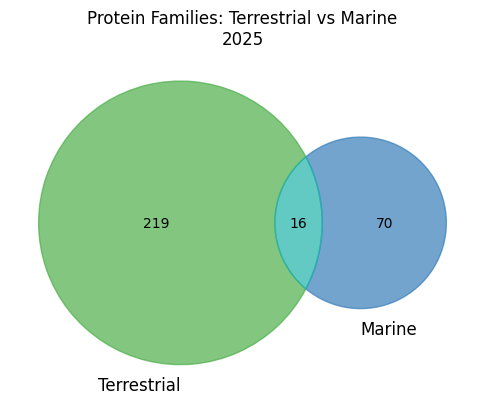

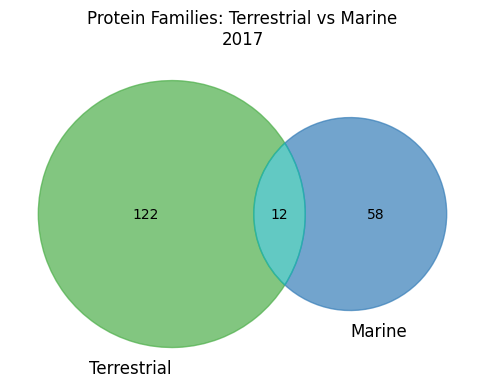

In [3]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


def plot_venn_for_year(csv_path, year_label=None):
    """
    Plots a Venn diagram of protein families for terrestrial vs marine habitats for a given CSV file.
    Terrestrial is green, marine is blue.
    """
    df = pd.read_csv(csv_path)
    # Get sets of protein families for each habitat
    marine_families = set(df[df["Habitat"].str.lower() == "marine"]["Protein families"].dropna())
    terrestrial_families = set(
        df[df["Habitat"].str.lower() == "terrestrial"]["Protein families"].dropna()
    )
    plt.figure(figsize=(6, 6))
    v = venn2(
        [terrestrial_families, marine_families],
        set_labels=("Terrestrial", "Marine"),
    )
    # Set colors: terrestrial = green, marine = blue
    if v.get_patch_by_id("10"):
        v.get_patch_by_id("10").set_color("#4daf4a")  # green
        v.get_patch_by_id("10").set_alpha(0.7)
    if v.get_patch_by_id("01"):
        v.get_patch_by_id("01").set_color("#377eb8")  # blue
        v.get_patch_by_id("01").set_alpha(0.7)
    if v.get_patch_by_id("11"):
        v.get_patch_by_id("11").set_color("#20B2AA")  # light sea green - better teal
        v.get_patch_by_id("11").set_alpha(0.7)
    if year_label is None:
        year_label = csv_path.split("/")[-1]
    plt.title(f"Protein Families: Terrestrial vs Marine\n{year_label}")
    plt.show()


# Plot for 2025
plot_venn_for_year("../data/processed/toxprot_2025.csv", year_label="2025")

# Plot for 2017
plot_venn_for_year("../data/processed/toxprot_2017.csv", year_label="2017")

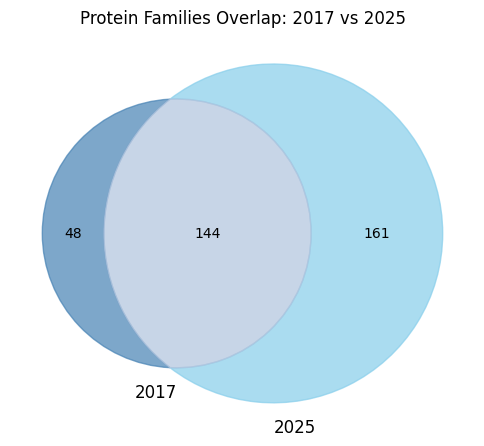

In [4]:
# Compare protein families between 2017 and 2025
import pandas as pd

# Load data
df_2017 = pd.read_csv("../data/processed/toxprot_2017.csv")
df_2025 = pd.read_csv("../data/processed/toxprot_2025.csv")

# Get sets of protein families (dropna to avoid NaNs)
families_2017 = set(df_2017["Protein families"].dropna())
families_2025 = set(df_2025["Protein families"].dropna())

plt.figure(figsize=(6, 6))
v = venn2(
    [families_2017, families_2025],
    set_labels=("2017", "2025"),
)

# Set colors: 2017 = steelblue, 2025 = #87CEEB, intersection = blend
if v.get_patch_by_id("10"):
    v.get_patch_by_id("10").set_color("steelblue")
    v.get_patch_by_id("10").set_alpha(0.7)
if v.get_patch_by_id("01"):
    v.get_patch_by_id("01").set_color("#87CEEB")
    v.get_patch_by_id("01").set_alpha(0.7)
if v.get_patch_by_id("11"):
    # Blend of steelblue and #87CEEB (light blue)
    v.get_patch_by_id("11").set_color("#b0c4de")
    v.get_patch_by_id("11").set_alpha(0.7)

plt.title("Protein Families Overlap: 2017 vs 2025")
plt.show()

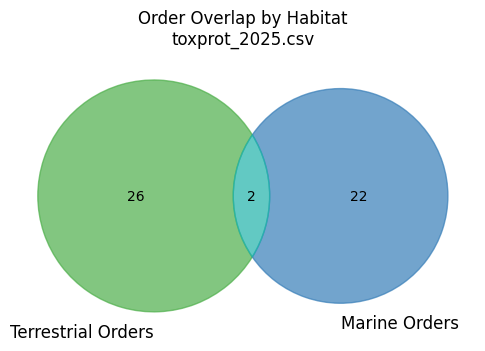

In [5]:
# Choose dataset: change the file path for 2017 or 2025
csv_path = "../data/processed/toxprot_2025.csv"

# Read the data
df = pd.read_csv(csv_path)

# Get sets of orders for each habitat
marine_orders = set(df[df["Habitat"].str.lower() == "marine"]["Order"].dropna())
terrestrial_orders = set(df[df["Habitat"].str.lower() == "terrestrial"]["Order"].dropna())

# Create a Venn diagram
plt.figure(figsize=(6, 6))
v = venn2(
    [terrestrial_orders, marine_orders],
    set_labels=("Terrestrial Orders", "Marine Orders"),
)
# Set colors: terrestrial = green, marine = blue
if v.get_patch_by_id("10"):
    v.get_patch_by_id("10").set_color("#4daf4a")  # green
    v.get_patch_by_id("10").set_alpha(0.7)
if v.get_patch_by_id("01"):
    v.get_patch_by_id("01").set_color("#377eb8")  # blue
    v.get_patch_by_id("01").set_alpha(0.7)
if v.get_patch_by_id("11"):
    v.get_patch_by_id("11").set_color("#20B2AA")  # light sea green - better teal
    v.get_patch_by_id("11").set_alpha(0.7)
plt.title(f"Order Overlap by Habitat\n{csv_path.split('/')[-1]}")
plt.show()

## Protein length distribution


In [ ]:
import numpy as np

toxprot_2025 = "../data/processed/toxprot_2025.csv"
toxprot_2017 = "../data/processed/toxprot_2017.csv"

df_2025 = pd.read_csv(toxprot_2025)
df_2017 = pd.read_csv(toxprot_2017)

# Define bins for sequence length
bins = list(range(1, 301, 25)) + [np.inf]
labels = [f"{start}-{end - 1}" for start, end in zip(bins[:-2], bins[1:-1], strict=False)] + [
    "300+"
]

# Bin the Length column for both years
df_2017["Length_bin"] = pd.cut(df_2017["Length"], bins=bins, labels=labels, right=False)
df_2025["Length_bin"] = pd.cut(df_2025["Length"], bins=bins, labels=labels, right=False)

# Count number of sequences in each bin
count_2017 = df_2017["Length_bin"].value_counts().sort_index()
count_2025 = df_2025["Length_bin"].value_counts().sort_index()

# Calculate percentage increase for each bin
pct_increase = ((count_2025 - count_2017) / count_2017) * 100

# Combine into a DataFrame for display
result = pd.DataFrame(
    {"2017_count": count_2017, "2025_count": count_2025, "pct_increase": pct_increase}
)

print(result)

## Protein existence


In [7]:
toxprot_2025 = "../data/processed/toxprot_2025.csv"
toxprot_2017 = "../data/processed/toxprot_2017.csv"

df_2025 = pd.read_csv(toxprot_2025)
df_2017 = pd.read_csv(toxprot_2017)

# Get value counts for each year
vc_2025 = df_2025["Protein existence"].value_counts(dropna=False)
vc_2017 = df_2017["Protein existence"].value_counts(dropna=False)

# Get all unique categories from both years
all_categories = set(vc_2025.index).union(set(vc_2017.index))

# Prepare output rows
rows = []
total_2017 = vc_2017.sum()
total_2025 = vc_2025.sum()

for cat in sorted(all_categories, key=lambda x: (str(x).lower() if pd.notnull(x) else "")):
    count_2017 = vc_2017.get(cat, 0)
    count_2025 = vc_2025.get(cat, 0)
    pct_2017 = (count_2017 / total_2017 * 100) if total_2017 > 0 else 0
    pct_2025 = (count_2025 / total_2025 * 100) if total_2025 > 0 else 0
    rows.append(
        {
            "Protein existence": cat,
            "2017_count": f"{count_2017} ({pct_2017:.1f}%)",
            "2025_count": f"{count_2025} ({pct_2025:.1f}%)",
        }
    )

result_df = pd.DataFrame(rows)
print(result_df)

                  Protein existence    2017_count    2025_count
0     1: Evidence at protein level;  3814 (56.9%)  4878 (60.6%)
1  2: Evidence at transcript level;  2314 (34.5%)  2031 (25.2%)
2        3: Inferred from homology;    572 (8.5%)  1143 (14.2%)
3                     5: Uncertain;      3 (0.0%)      3 (0.0%)


## GO term analysis


In [8]:
toxprot_2025 = "../data/processed/toxprot_2025.csv"
toxprot_2017 = "../data/processed/toxprot_2017.csv"

df_2025 = pd.read_csv(toxprot_2025)
df_2017 = pd.read_csv(toxprot_2017)


def get_go_counts(df, go_col="Gene Ontology (GO)"):
    # Dropna, split by <; >, flatten, and count
    go_series = df[go_col].dropna().astype(str)
    all_terms = []
    for entry in go_series:
        terms = [t.strip() for t in entry.split(";") if t.strip()]
        all_terms.extend(terms)
    return pd.Series(all_terms).value_counts(), all_terms, go_series


# Get GO term counts and all terms for each year
go_counts_2025, all_terms_2025, go_series_2025 = get_go_counts(df_2025)
go_counts_2017, all_terms_2017, go_series_2017 = get_go_counts(df_2017)

# Get top 5 GO terms for each year
top_5_2025 = go_counts_2025.head(5)
top_5_2017 = go_counts_2017.head(5)

# Prepare output for 2017
total_2017 = go_counts_2017.sum()
rows_2017 = []
for term, count in top_5_2017.items():
    pct = (count / total_2017 * 100) if total_2017 > 0 else 0
    rows_2017.append({"GO term": term, "2017_count": f"{count} ({pct:.1f}%)"})
result_2017 = pd.DataFrame(rows_2017)
print("Top 5 GO terms for 2017:")
print(result_2017)

# Prepare output for 2025
total_2025 = go_counts_2025.sum()
rows_2025 = []
for term, count in top_5_2025.items():
    pct = (count / total_2025 * 100) if total_2025 > 0 else 0
    rows_2025.append({"GO term": term, "2025_count": f"{count} ({pct:.1f}%)"})
result_2025 = pd.DataFrame(rows_2025)
print("\nTop 5 GO terms for 2025:")
print(result_2025)

# Additionally, print total number of GO terms and average number of GO terms per protein for each year
num_proteins_2017 = len(df_2017)
num_proteins_2025 = len(df_2025)
total_go_terms_2017 = len(all_terms_2017)
total_go_terms_2025 = len(all_terms_2025)
avg_go_terms_per_protein_2017 = (
    total_go_terms_2017 / num_proteins_2017 if num_proteins_2017 > 0 else 0
)
avg_go_terms_per_protein_2025 = (
    total_go_terms_2025 / num_proteins_2025 if num_proteins_2025 > 0 else 0
)

print(
    f"\n2017: Total GO term assignments: {total_go_terms_2017}, Average GO terms per protein: {avg_go_terms_per_protein_2017:.2f}"
)
print(
    f"2025: Total GO term assignments: {total_go_terms_2025}, Average GO terms per protein: {avg_go_terms_per_protein_2025:.2f}"
)

# Print the number of unique GO terms for each year
unique_go_terms_2017 = go_counts_2017.index.nunique()
unique_go_terms_2025 = go_counts_2025.index.nunique()
print(f"\n2017: Number of unique GO terms: {unique_go_terms_2017}")
print(f"2025: Number of unique GO terms: {unique_go_terms_2025}")


# --- Extension: Print number of unique "Gene Ontology (molecular function)" per year ---
def get_unique_go_molecular_function(df, col="Gene Ontology (molecular function)"):
    # Dropna, split by ;, flatten, and get unique terms
    go_series = df[col].dropna().astype(str)
    all_terms = []
    for entry in go_series:
        terms = [t.strip() for t in entry.split(";") if t.strip()]
        all_terms.extend(terms)
    unique_terms = set(all_terms)
    return len(unique_terms), unique_terms


num_unique_mf_2017, unique_mf_2017 = get_unique_go_molecular_function(df_2017)
num_unique_mf_2025, unique_mf_2025 = get_unique_go_molecular_function(df_2025)

print(f"\n2017: Number of unique 'Gene Ontology (molecular function)': {num_unique_mf_2017}")
print(f"2025: Number of unique 'Gene Ontology (molecular function)': {num_unique_mf_2025}")

Top 5 GO terms for 2017:
                                             GO term    2017_count
0                  GO:0005576 (extracellular region)  6635 (33.1%)
1                        GO:0090729 (toxin activity)  5840 (29.2%)
2                     GO:0046872 (metal ion binding)    562 (2.8%)
3  GO:0035792 (other organism postsynaptic membrane)    554 (2.8%)
4               GO:0016042 (lipid catabolic process)    432 (2.2%)

Top 5 GO terms for 2025:
                                             GO term    2025_count
0                  GO:0005576 (extracellular region)  7556 (26.8%)
1                        GO:0090729 (toxin activity)  7037 (24.9%)
2        GO:0099106 (ion channel regulator activity)    778 (2.8%)
3  GO:0031640 (killing of cells of another organism)    687 (2.4%)
4               GO:0016042 (lipid catabolic process)    672 (2.4%)

2017: Total GO term assignments: 20023, Average GO terms per protein: 2.99
2025: Total GO term assignments: 28244, Average GO terms per protein:

In [9]:
toxprot_2025 = "../data/processed/toxprot_2025.csv"
toxprot_2017 = "../data/processed/toxprot_2017.csv"

df_2025 = pd.read_csv(toxprot_2025)
df_2017 = pd.read_csv(toxprot_2017)

# Analyse the number of NaN in the column "Gene Ontology (molecular function)"
col_name = "Gene Ontology (molecular function)"

# For 2017
num_nan_2017 = df_2017[col_name].isna().sum()
total_2017 = len(df_2017)
pct_nan_2017 = (num_nan_2017 / total_2017 * 100) if total_2017 > 0 else 0

print(
    f"2017: Number of NaN in '{col_name}': {num_nan_2017} out of {total_2017} proteins ({pct_nan_2017:.1f}%)"
)

# For 2025
num_nan_2025 = df_2025[col_name].isna().sum()
total_2025 = len(df_2025)
pct_nan_2025 = (num_nan_2025 / total_2025 * 100) if total_2025 > 0 else 0

print(
    f"2025: Number of NaN in '{col_name}': {num_nan_2025} out of {total_2025} proteins ({pct_nan_2025:.1f}%)"
)

2017: Number of NaN in 'Gene Ontology (molecular function)': 506 out of 6703 proteins (7.5%)
2025: Number of NaN in 'Gene Ontology (molecular function)': 578 out of 8055 proteins (7.2%)


## Taxa Order analysis


In [10]:
# Assuming df_2017 and df_2025 are already loaded as in previous cells


def get_top_taxa_counts(df, taxa_column="Order", top_n=5):
    """Function to get top N taxa and group the rest as 'Others'."""
    taxa_counts = df[taxa_column].value_counts()
    top_taxa = taxa_counts.nlargest(top_n)
    result = top_taxa.to_dict()
    others = taxa_counts[~taxa_counts.index.isin(top_taxa.index)]
    result["Others"] = others.sum()
    return result, others


# For 2017
top_taxa_2017_counts, others_2017 = get_top_taxa_counts(df_2017, "Order", 5)
print(f"Number of taxa orders in 'Others' for 2017: {len(others_2017)}")
print("Top 5 taxa orders in 'Others' for 2017:")
print(others_2017.head(5))

# For 2025
top_taxa_2025_counts, others_2025 = get_top_taxa_counts(df_2025, "Order", 5)
print(f"\nNumber of taxa orders in 'Others' for 2025: {len(others_2025)}")
print("Top 5 taxa orders in 'Others' for 2025:")
print(others_2025.head(5))

Number of taxa orders in 'Others' for 2017: 33
Top 5 taxa orders in 'Others' for 2017:
Order
Actiniaria           236
Anura                 79
Scolopendromorpha     52
Perciformes           12
Scleractinia          11
Name: count, dtype: int64

Number of taxa orders in 'Others' for 2025: 45
Top 5 taxa orders in 'Others' for 2025:
Order
Actiniaria           292
Scolopendromorpha    196
Anura                 78
Diptera               74
Ixodida               47
Name: count, dtype: int64


## Species distribution across habitats


In [11]:
# Print and format all species belonging to freshwater and estuarine for 2017 and 2025, with summary counts for easy copy-pasting

habitat_col = "Habitat_Detailed"
species_col = "Species"


def format_species_list(year, habitat, species_list):
    header = f"{year} - {habitat.capitalize()} species ({len(species_list)} unique):"
    if len(species_list) == 0:
        species_lines = ["  (none found)"]
    else:
        species_lines = [f"  - {sp}" for sp in sorted(species_list)]
    return header + "\n" + "\n".join(species_lines)


# 2017
freshwater_species_2017 = df_2017[df_2017[habitat_col] == "freshwater"][species_col].unique()
estuarine_species_2017 = df_2017[df_2017[habitat_col] == "estuarine"][species_col].unique()

freshwater_2017_text = format_species_list("2017", "freshwater", freshwater_species_2017)
estuarine_2017_text = format_species_list("2017", "estuarine", estuarine_species_2017)

# 2025
freshwater_species_2025 = df_2025[df_2025[habitat_col] == "freshwater"][species_col].unique()
estuarine_species_2025 = df_2025[df_2025[habitat_col] == "estuarine"][species_col].unique()

freshwater_2025_text = format_species_list("2025", "freshwater", freshwater_species_2025)
estuarine_2025_text = format_species_list("2025", "estuarine", estuarine_species_2025)

email_report = (
    f"Freshwater and estuarine species breakdown for 2017 and 2025:\n\n"
    f"{freshwater_2017_text}\n\n"
    f"{estuarine_2017_text}\n\n"
    f"{freshwater_2025_text}\n\n"
    f"{estuarine_2025_text}"
)

print(email_report)

# Save the output as a txt file under out/ directory
with open("../out/frashwater_analysis.txt", "w", encoding="utf-8") as fout:
    fout.write(email_report)

Freshwater and estuarine species breakdown for 2017 and 2025:

2017 - Freshwater species (10 unique):
  - Amia calva
  - Helicops angulatus
  - Hydra viridissima
  - Hydra vulgaris
  - Lepisosteus osseus
  - Oncorhynchus mykiss
  - Pomacea canaliculata
  - Potamotrygon orbignyi
  - Pseudoferania polylepis
  - Trachemys scripta

2017 - Estuarine species (1 unique):
  - Cerberus rynchops

2025 - Freshwater species (15 unique):
  - Amia calva
  - Haementeria depressa
  - Haementeria ghilianii
  - Haementeria officinalis
  - Helicops angulatus
  - Hirudo medicinalis
  - Hydra viridissima
  - Hydra vulgaris
  - Lepisosteus osseus
  - Oncorhynchus mykiss
  - Pomacea canaliculata
  - Pomacea maculata
  - Potamotrygon orbignyi
  - Pseudoferania polylepis
  - Trachemys scripta

2025 - Estuarine species (1 unique):
  - Cerberus rynchops
